In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/Users/philipgoh/.fastai/data/mnist_sample')

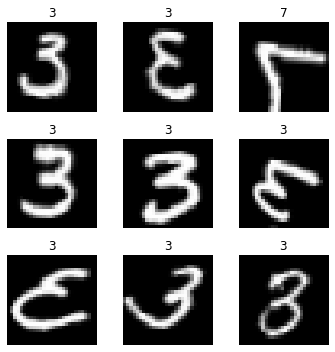

In [22]:
# Let's make this harder, also do flips(!)
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms)
data.show_batch(3, figsize=(5,5))

In [23]:
learner = create_cnn(data, models.resnet18, metrics=accuracy)
learner.fit_one_cycle(3)

/Users/philipgoh/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time
0,0.212028,0.195302,0.930815,00:54
1,0.123891,0.098780,0.965653,00:55
2,0.111498,0.087635,0.970559,00:54


In [24]:
interpretation = ClassificationInterpretation.from_learner(learner)
losses, indexes = interpretation.top_losses()
len(data.valid_ds)==len(losses)==len(indexes)

True

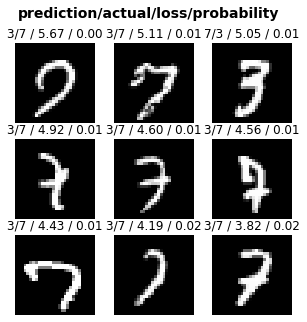

In [27]:
interpretation.plot_top_losses(9, figsize=(5,5))

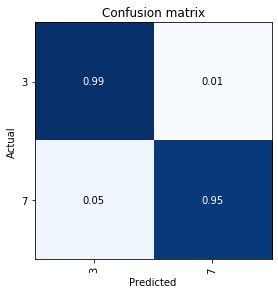

In [28]:
interpretation.plot_confusion_matrix(normalize=True)

In [30]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


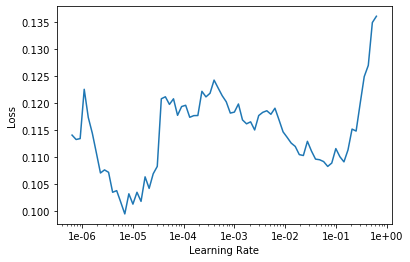

In [31]:
learner.recorder.plot()